# 해보자일단

In [1]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
feature_name_df = pd.read_csv('../00.data/UCI HAR Dataset/UCI HAR Dataset/features.txt', sep='\s+', header=None, 
                              names=['column_index','column_name'])

In [3]:
feature_name_df.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [4]:
feature_name_df.column_name

0                         tBodyAcc-mean()-X
1                         tBodyAcc-mean()-Y
2                         tBodyAcc-mean()-Z
3                          tBodyAcc-std()-X
4                          tBodyAcc-std()-Y
                       ...                 
556        angle(tBodyGyroMean,gravityMean)
557    angle(tBodyGyroJerkMean,gravityMean)
558                    angle(X,gravityMean)
559                    angle(Y,gravityMean)
560                    angle(Z,gravityMean)
Name: column_name, Length: 561, dtype: object

In [5]:
len(feature_name_df.column_name.unique())

477

### 모두 다른 이름을 갖고 있는게 아니다

In [6]:
unique_name = feature_name_df.column_name.unique()
for i in unique_name:
    if len(feature_name_df.column_name[feature_name_df.column_name == i]) > 1 :
        count = len(feature_name_df.column_name[feature_name_df.column_name == i])
        print (f' 갯수 :{count}')
        print (f' 칼럼이름 : {i}')

 갯수 :3
 칼럼이름 : fBodyAcc-bandsEnergy()-1,8
 갯수 :3
 칼럼이름 : fBodyAcc-bandsEnergy()-9,16
 갯수 :3
 칼럼이름 : fBodyAcc-bandsEnergy()-17,24
 갯수 :3
 칼럼이름 : fBodyAcc-bandsEnergy()-25,32
 갯수 :3
 칼럼이름 : fBodyAcc-bandsEnergy()-33,40
 갯수 :3
 칼럼이름 : fBodyAcc-bandsEnergy()-41,48
 갯수 :3
 칼럼이름 : fBodyAcc-bandsEnergy()-49,56
 갯수 :3
 칼럼이름 : fBodyAcc-bandsEnergy()-57,64
 갯수 :3
 칼럼이름 : fBodyAcc-bandsEnergy()-1,16
 갯수 :3
 칼럼이름 : fBodyAcc-bandsEnergy()-17,32
 갯수 :3
 칼럼이름 : fBodyAcc-bandsEnergy()-33,48
 갯수 :3
 칼럼이름 : fBodyAcc-bandsEnergy()-49,64
 갯수 :3
 칼럼이름 : fBodyAcc-bandsEnergy()-1,24
 갯수 :3
 칼럼이름 : fBodyAcc-bandsEnergy()-25,48
 갯수 :3
 칼럼이름 : fBodyAccJerk-bandsEnergy()-1,8
 갯수 :3
 칼럼이름 : fBodyAccJerk-bandsEnergy()-9,16
 갯수 :3
 칼럼이름 : fBodyAccJerk-bandsEnergy()-17,24
 갯수 :3
 칼럼이름 : fBodyAccJerk-bandsEnergy()-25,32
 갯수 :3
 칼럼이름 : fBodyAccJerk-bandsEnergy()-33,40
 갯수 :3
 칼럼이름 : fBodyAccJerk-bandsEnergy()-41,48
 갯수 :3
 칼럼이름 : fBodyAccJerk-bandsEnergy()-49,56
 갯수 :3
 칼럼이름 : fBodyAccJerk-bandsEnergy()-57,64
 갯수 :3
 

### 같은 이름을 갖고 있는 피쳐

In [7]:
for i in unique_name:
    if len(feature_name_df.column_name[feature_name_df.column_name == i]) > 1 :
        t_l = feature_name_df.column_name[feature_name_df.column_name == i].index
        feature_name_df.column_name[feature_name_df.column_name == i] += ['_1','_2','_3']

In [8]:
len(feature_name_df.column_name.unique())

561

#### 각각 다른이름 붙인 것을 확인

In [9]:
feature_name = feature_name_df.iloc[:, 1].values.tolist()

### 데이터 불러오기

In [10]:
X_train = pd.read_csv('../00.data/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', sep='\s+', names=feature_name)
X_test = pd.read_csv('../00.data/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt', sep='\s+', names=feature_name)

In [11]:
y_train = pd.read_csv('../00.data/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', sep='\s+', names=['action'])
y_test = pd.read_csv('../00.data/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt', sep='\s+', names=['action'])

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7352, 561), (7352, 1), (2947, 561), (2947, 1))

### 제약 x

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8547675602307431

### 최적의 하이퍼 파라미터

In [15]:
from sklearn.model_selection import GridSearchCV


### GridSearchCV로 최적의 하이퍼 파라미터 도출


In [16]:
params = {
    'max_depth': [6, 8, 10, 12, 16, 20]
}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print(f'최고 평균 정확도: {grid_cv.best_score_:.4f}')
print('최적 파라미터:', grid_cv.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.1min finished
최고 평균 정확도: 0.8513
최적 파라미터: {'max_depth': 16}


In [17]:
df = pd.DataFrame(grid_cv.cv_results_)
df = df[['param_max_depth', 'mean_test_score']]
df

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800


In [18]:
params = {
    'max_depth': [14, 16, 18]
}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print(f'최고 평균 정확도: {grid_cv.best_score_:.4f}')
print('최적 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   39.1s finished
최고 평균 정확도: 0.8513
최적 파라미터: {'max_depth': 16}


In [19]:
df = pd.DataFrame(grid_cv.cv_results_)
df = df[['param_max_depth', 'mean_test_score']]
df

,param_max_depth,mean_test_score
0,14,0.847808
1,16,0.851344
2,18,0.851072


- min_samples_split 도출

In [20]:
params = {
    'max_depth': [8, 12, 16, 18],
    'min_samples_split': [12, 16, 20, 24]
}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print(f'최고 평균 정확도: {grid_cv.best_score_:.4f}')
print('최적 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  3.1min finished
최고 평균 정확도: 0.8549
최적 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [21]:
df = pd.DataFrame(grid_cv.cv_results_)
df = df[['param_max_depth', 'param_min_samples_split', 'mean_test_score']]
df

,param_max_depth,param_min_samples_split,mean_test_score
0,8,12,0.852566
1,8,16,0.854879
2,8,20,0.852567
3,8,24,0.851342
4,12,12,0.848623
5,12,16,0.845768
6,12,20,0.846175
7,12,24,0.846175
8,16,12,0.844543
9,16,16,0.847127


### 최적모델

In [22]:
best_dt_clf = grid_cv.best_estimator_
pred = best_dt_clf.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f'테스트 셋에 대한 정확도: {acc:.4f}')

테스트 셋에 대한 정확도: 0.8717


### 중요도 시각화

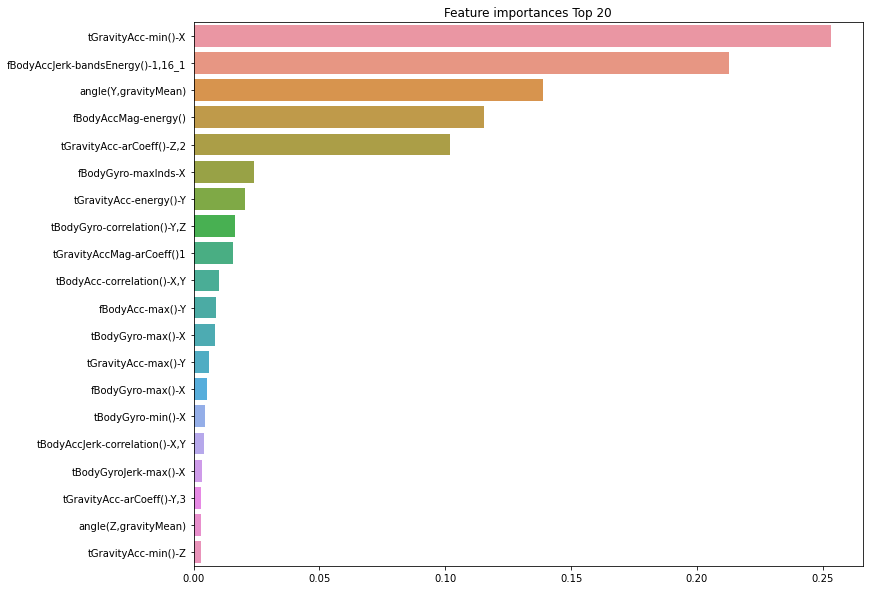

In [25]:
import seaborn as sns

feature_importances = pd.Series(best_dt_clf.feature_importances_, index=feature_name)
top20_feature = feature_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(12,10))
plt.title('Feature importances Top 20')
sns.barplot(x=top20_feature, y=top20_feature.index)
plt.show()